variance explained (MLE): 0.9993393121803179
variance explained (LSE): 0.9993941934649424


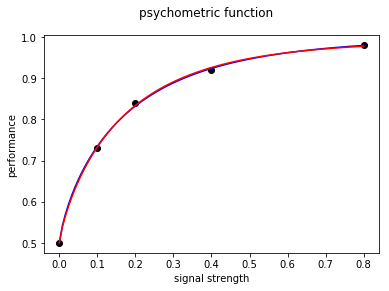

In [9]:
# -*- coding: utf-8 -*-

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

#最小二乗法
# model for performance ========
def probabilityCorrect(x, signal):
    # x: model parameters
    # s: signal strength

    # probability of correct 
    return 0.5 + (0.5 - x[0])*(1 - np.exp(-(signal/x[1])**x[2]))

def cost_MLE(x, signal, performance, ntr):       
    # compute cost
    c = 0
    for n in np.arange(len(ntr)):
        # model output 
        p = probabilityCorrect(x, signal[n])

        # cost as the negative likelihood
        if 0 < p <= 1:
            c += -ntr[n]*(performance[n]*np.log(p) + (1 - performance[n])*np.log(1 - p))

    return c 

#最尤推定
def cost_LSE(x, signal, performance, ntr):       
    # compute cost
    c = 0
    for n in np.arange(len(ntr)):
        # model output 
        p = probabilityCorrect(x, signal[n])

        # cost as the summed squared error
        c += ntr[n]*(performance[n] - p)**2

    return c 

# signal strength
signal = [0, 0.1, 0.2, 0.4, 0.8]

# performance
performance = [0.5, 0.73, 0.84, 0.92, 0.98]

# number of trials
ntr = [50, 45, 40, 35, 30]

# initial guess and boundary
x0 = [0, 0.2, 1]
bound = [(0, None),(0.0001, None),(0,None)]

# maximum likelihood
params_MLE = optimize.minimize(cost_MLE,x0,args=(signal,performance,ntr,),method='l-bfgs-b',\
                        jac=None, bounds=bound, tol=None, callback=None,\
                        options={'disp': None, 'maxls': 20, 'iprint': -1,\
                                 'gtol': 1e-05, 'eps': 1e-08, 'maxiter': 15000,\
                                 'ftol': 2.220446049250313e-09, 'maxcor': 10,\
                                 'maxfun': 15000})

# least squared error
params_LSE = optimize.minimize(cost_LSE,x0,args=(signal,performance,ntr,),method='l-bfgs-b',\
                        jac=None, bounds=bound, tol=None, callback=None,\
                        options={'disp': None, 'maxls': 20, 'iprint': -1,\
                                 'gtol': 1e-05, 'eps': 1e-08, 'maxiter': 15000,\
                                 'ftol': 2.220446049250313e-09, 'maxcor': 10,\
                                 'maxfun': 15000})

# compute variance explained
fitted_acc_mle = np.zeros(len(signal))
fitted_acc_lse = np.zeros(len(signal))
for s in np.arange(len(signal)):
    fitted_acc_mle[s] = probabilityCorrect(params_MLE.x,signal[s])
    fitted_acc_lse[s] = probabilityCorrect(params_LSE.x,signal[s])

varexp_mle = 1 - (np.var(fitted_acc_mle - performance)/np.var(performance))
varexp_lse = 1 - (np.var(fitted_acc_lse - performance)/np.var(performance))

print('variance explained (MLE): ' + str(varexp_mle))
print('variance explained (LSE): ' + str(varexp_lse))    

# visualize
signals = np.linspace(0,0.8,100)
acc_mle = np.zeros(100)
acc_lse = np.zeros(100)

for i in np.arange(100):
    acc_mle[i] = probabilityCorrect(params_MLE.x,signals[i])
    acc_lse[i] = probabilityCorrect(params_LSE.x,signals[i])

fig = plt.figure()
fig.suptitle('psychometric function')

ax = fig.add_subplot(111)

ax.set_xlabel('signal strength')
ax.set_ylabel('performance')    
plt.plot(signal, performance, 'ko')
plt.plot(signals, acc_mle, '-b')#最尤推定は青
plt.plot(signals, acc_lse, '-r')#最小二乗法は赤